In [ ]:
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt

#Text Color
from termcolor import colored

#Train Test Split
from sklearn.model_selection import train_test_split

#Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

#Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model

import keras

from transformers import BertTokenizer
from tqdm.auto import tqdm

import pandas as pd
import numpy as np

In [ ]:
### loading google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/498-CAPSTONE/Data/data_for_model"

/content/drive/MyDrive/Colab Notebooks/498-CAPSTONE/Data/data_for_model


In [ ]:
df=pd.read_csv("Final_data_model_no_stop_lement.csv")
df

,cleaned_text,class,selftext_length
0,what is the point see no point in doing life y...,suicide,282
1,had shotgun off safety in my mouth today i am ...,suicide,308
2,i am going to commit suicide within next few h...,suicide,76
3,depression and no one around be been dealing w...,suicide,108
4,nothing like seeing all the other posts around...,suicide,25
...,...,...,...
17015,accounts incredibly overdue a life entirely un...,stressed,28
17016,hey so i come from a middle class family and s...,stressed,59
17017,but then i will get there and he will drop the...,stressed,77
17018,i do not have the ability to cope with it anym...,stressed,61


In [ ]:
dd=df[df["cleaned_text"].duplicated()]
dd["class"].value_counts()

stressed      2
depression    1
Name: class, dtype: int64

In [ ]:
### Dropping na values and duplicates

df=df.dropna()
df=df.drop_duplicates()
df=df.reset_index(drop=True)

In [ ]:
df["class"].value_counts()

suicide          10162
depression        4338
stressed          1484
casual-talk       1018
high-suicidal       16
Name: class, dtype: int64

In [ ]:
## Splitting data to X and Y

X=df["cleaned_text"].astype(str)
Y= df['class']


In [ ]:
### ensuring data is loaded in string format and analyzing max length of text

text_data= df['cleaned_text'].astype(str)

max_len=text_data.map(lambda x: len(x.split())).max()

max_len

982

In [ ]:
### Looking at Statistics of data
df["selftext_length"]= [len(df["cleaned_text"][i].split()) for i in range(len(df))]
df["selftext_length"].describe()



count    17018.000000
mean       128.096897
std        107.049252
min          3.000000
25%         50.000000
50%         95.000000
75%        178.000000
max        982.000000
Name: selftext_length, dtype: float64

In [ ]:
### Dropping depression and suicide data that are more than 500 words long because they are outiers
s
dd=df[df["selftext_length"]>=500]
dd["class"].value_counts()



depression    110
suicide         2
Name: class, dtype: int64

In [ ]:
data=pd.DataFrame()
data["X"]=df["cleaned_text"].astype(str)
data["Y"]=df['class']

In [ ]:
## Defining training and testing data. This way the model will never see the testing dataset

train_df,test_df= train_test_split(data,
                                   train_size=0.70, 
                                   shuffle=True, 
                                   random_state=42, 
                                   stratify=Y)

In [ ]:
### encoding labels to 0-4 since we have 5 classes

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_df['Sentiment_label'] = le.fit_transform(train_df['Y'])
test_df['Sentiment_label'] = le.transform(test_df['Y'])


In [ ]:
## Creating label dict so we know what the encodings are

label_dict = (test_df[['Y','Sentiment_label']].drop_duplicates()
              .sort_values(by='Sentiment_label')
              .reset_index(drop=True)['Y']
              .to_dict())

for index, key in label_dict.items():
    print(index, key)

0 casual-talk
1 depression
2 high-suicidal
3 stressed
4 suicide


In [ ]:
### Creating labels_5 variable for visualizng data into this class
labels_5 = ['Casual-Talk','Depression','Highly-Suicidal',"Stressed","Suicide"]

In [ ]:
len(train_df)

11912

In [ ]:
### training data and label
x_train = train_df['X']
y_train = train_df['Sentiment_label']

In [ ]:
### testing data and labels

x_test = test_df['X']
y_test = test_df['Sentiment_label']
print(f"{len(x_test)} testing examples")

5106 testing examples


## Naive Bayes (Baseline Model)

### Creating abaseline model to compare models

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(x_train, y_train)

In [ ]:
### Model Makes predictions
y_hat = model.predict(x_test)

In [ ]:
### writing function to show cosnfusion matrix


import seaborn as sns
print("Accuracy:", accuracy_score(y_test, y_hat))
labels_5 = ['Casual-Talk','Depression','Highly-Suicidal',"Stressed","Suicide"]

def print_cf1(y_test, y_hat):
    cm = confusion_matrix(y_test, y_hat)
    sns.set(font_scale = 1.4, color_codes=True, palette="deep")
    sns.heatmap(pd.DataFrame(cm, index=labels_5,columns=[0,1,2,3,4]), 
                annot = True,
                annot_kws = {"size":16},
                fmt="d",
                cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Value")
    plt.xticks([0,1,2,3,4], labels_5, rotation=45)
    plt.ylabel("True Value")
    plt.show()

Accuracy: 0.6390520955738347


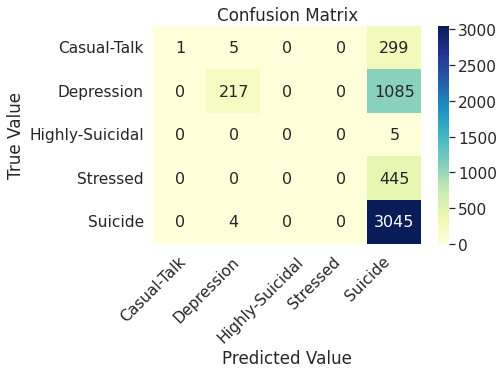

In [ ]:
### Confusion Matrix of Bas Model
    
print_cf1(y_test, y_hat)

In [ ]:
### Classification report of base model

print(classification_report(y_test, y_hat, target_names=labels_5))

                 precision    recall  f1-score   support

    Casual-Talk       1.00      0.00      0.01       305
     Depression       0.96      0.17      0.28      1302
Highly-Suicidal       0.00      0.00      0.00         5
       Stressed       0.00      0.00      0.00       445
        Suicide       0.62      1.00      0.77      3049

       accuracy                           0.64      5106
      macro avg       0.52      0.23      0.21      5106
   weighted avg       0.68      0.64      0.53      5106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Building Electra Model

In [26]:
### Setting Maximum text length to 500



max_length=500

MAX_LENGTH=max_length
max_len=max_length
maxlen=max_len

In [27]:
from transformers import AutoTokenizer, AutoModel
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils.np_utils import to_categorical


In [28]:
# tokenizer = ElectraTokenizer.from_pretrained("google/electra-small-discriminator")

In [29]:
tokenizer = ElectraTokenizer.from_pretrained("google/electra-base-discriminator")


In [30]:
### Defining Tokenizing function to tokenize texts


def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [31]:
### Tokenizing training and testing data

X_train = tokenize(x_train, tokenizer)
X_test = tokenize(x_test, tokenizer)

  0%|          | 0/11914 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2310: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


  0%|          | 0/5106 [00:00<?, ?it/s]

## Building Model

In [32]:
from transformers import TFElectraModel, ElectraConfig, AutoConfig

In [33]:
#  "google/electra-small-generator",
#   "google/electra-base-generator",
#   "google/electra-large-generator",
#   "google/electra-small-discriminator",
#   "google/electra-base-discriminator",
#   "google/electra-large-discriminator"

In [44]:
### Electra Architecture

config = AutoConfig.from_pretrained('google/electra-base-discriminator', output_hidden_states=True, output_attentions=True)
electra= TFElectraModel.from_pretrained('google/electra-base-discriminator') # bert base model with pretrained weights

input_ids_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer = electra.electra(input_ids = input_ids_in, attention_mask = input_masks_in)[0]

X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True))(embedding_layer)
X = tf.keras.layers.Dropout(0.5)(X)
# X = tf.keras.layers.GlobalMaxPool1D()(X)

X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(X)
X = tf.keras.layers.Dropout(0.5)(X)
X = tf.keras.layers.GlobalMaxPool1D()(X)

X = tf.keras.layers.Dense(1024, activation='relu')(X)
X = tf.keras.layers.Dropout(0.5)(X)

X = tf.keras.layers.Dense(128, activation='relu')(X)
X = tf.keras.layers.Dropout(0.5)(X)

X = tf.keras.layers.Dense(32, activation='relu')(X)
X = tf.keras.layers.Dropout(0.5)(X)
# X = tf.keras.layers.GlobalMaxPool1D()(X)

X = tf.keras.layers.Dense(5, activation='softmax')(X)

model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)

for layer in model.layers[:3]:
    layer.trainable = False

model.summary()

Some layers from the model checkpoint at google/electra-base-discriminator were not used when initializing TFElectraModel: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFElectraModel were initialized from the model checkpoint at google/electra-base-discriminator.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 500)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 500)]        0           []                               
                                                                                                  
 electra (TFElectraMainLayer)   TFBaseModelOutputWi  108891648   ['input_token[0][0]',            
                                thPastAndCrossAtten               'masked_token[0][0]']           
                                tions(last_hidden_s                                               
                                tate=(None, 500, 76                                         

In [45]:
### Defining optimizer and learning rate, sloss functon and accuracy metrics

# optim = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
optim = tf.keras.optimizers.Adam()
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [46]:
##3 Compiling model

model.compile(loss=loss_func, 
                        optimizer=optim, 
                        metrics=[tf.keras.metrics.categorical_accuracy,
#                                  tf.keras.metrics.PrecisionAtRecall(0.5),
#                                  tf.keras.metrics.Precision(),
#                                  tf.keras.metrics.Recall(),
#                                 tf.keras.metrics.TopKCategoricalAccuracy(),
#                                 tf.keras.metrics.TrueNegatives(),
#                                  tf.keras.metrics.TruePositives(),
#                                 tf.keras.metrics.FalseNegatives(),
#                                 tf.keras.metrics.FalsePositives(),
#                                 tf.keras.metrics.MeanAbsoluteError(),
                                ])
                        
                        
                        
                        
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 500)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 500)]        0           []                               
                                                                                                  
 electra (TFElectraMainLayer)   TFBaseModelOutputWi  108891648   ['input_token[0][0]',            
                                thPastAndCrossAtten               'masked_token[0][0]']           
                                tions(last_hidden_s                                               
                                tate=(None, 500, 76                                         

In [47]:
%cd "/content/drive/MyDrive/Colab Notebooks/498-CAPSTONE/model"

/content/drive/MyDrive/Colab Notebooks/498-CAPSTONE/model


In [48]:
%ls

checkpoint
electra_full.h5
electra_full_model_epoch_1.00__val_loss1.0882__val_accuracy_0.5921.h5
electra_full_model_epoch_1.00__val_loss1.1013__val_accuracy_0.5921.h5
electra_full_model_epoch_1.00__val_loss1.18__val_accuracy_0.59.h5
electra_full_model_epoch_2.00__val_loss1.0807__val_accuracy_0.5921.h5
electra_full_model_epoch_2.00__val_loss1.0835__val_accuracy_0.5921.h5
electra_full_model_epoch_2.00__val_loss1.13__val_accuracy_0.59.h5
electra_full_model_epoch_3.00__val_loss1.0607__val_accuracy_0.5921.h5
electra_full_model_epoch_3.00__val_loss1.0609__val_accuracy_0.5921.h5
electra_full_model_epoch_3.00__val_loss1.09__val_accuracy_0.59.h5
electra_full_model_epoch_4.00__val_loss1.0894__val_accuracy_0.5921.h5
electra_full_model_epoch_4.00__val_loss1.08__val_accuracy_0.59.h5
electra_full_model_epoch_4.00__val_loss1.0974__val_accuracy_0.5921.h5
electra_full_model_epoch_5.00__val_loss1.07__val_accuracy_0.59.h5
electra_full_model_epoch_5.00__val_loss1.0961__val_accuracy_0.5921.h5
electra_full_

In [49]:
filepath= "electra_full_model_epoch_{epoch:.2f}__val_loss{val_loss:.3f}__val_accuracy_{val_categorical_accuracy:.3f}.h5"


In [50]:
### Defining constants
ssss
epoch=200
patiences= 10
batch_size= 32

In [51]:
#### defining constants


cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath, 
    verbose=2, 
    save_weights_only=False,
    mode="max",
    save_best_only=False,
    save_freq="epoch")

In [52]:
### Converting training and testing values to categorical since model needs categorical data not encodings

Y_train_cat = keras.utils.to_categorical(y_train)

Y_test_cat = keras.utils.to_categorical(y_test)


In [53]:
### Training Model


hist = model.fit(
    X_train, 
    Y_train_cat, 
    epochs =epoch,
    batch_size=batch_size,
    shuffle= True,
    validation_split=.3,
    verbose=1,
    
    callbacks=[cp_callback,
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patiences)]
)

Epoch 1/200
261/261 [==============================] - ETA: 0s - loss: 1.0246 - categorical_accuracy: 0.6322
Epoch 1: saving model to electra_full_model_epoch_1.00__val_loss0.992__val_accuracy_0.770.h5
261/261 [==============================] - 112s 358ms/step - loss: 1.0246 - categorical_accuracy: 0.6322 - val_loss: 0.9919 - val_categorical_accuracy: 0.7695
Epoch 2/200
261/261 [==============================] - ETA: 0s - loss: 0.7215 - categorical_accuracy: 0.7582
Epoch 2: saving model to electra_full_model_epoch_2.00__val_loss0.699__val_accuracy_0.776.h5
261/261 [==============================] - 89s 340ms/step - loss: 0.7215 - categorical_accuracy: 0.7582 - val_loss: 0.6995 - val_categorical_accuracy: 0.7762
Epoch 3/200
261/261 [==============================] - ETA: 0s - loss: 0.6335 - categorical_accuracy: 0.7680
Epoch 3: saving model to electra_full_model_epoch_3.00__val_loss0.619__val_accuracy_0.786.h5
261/261 [==============================] - 89s 340ms/step - loss: 0.6335 - ca

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


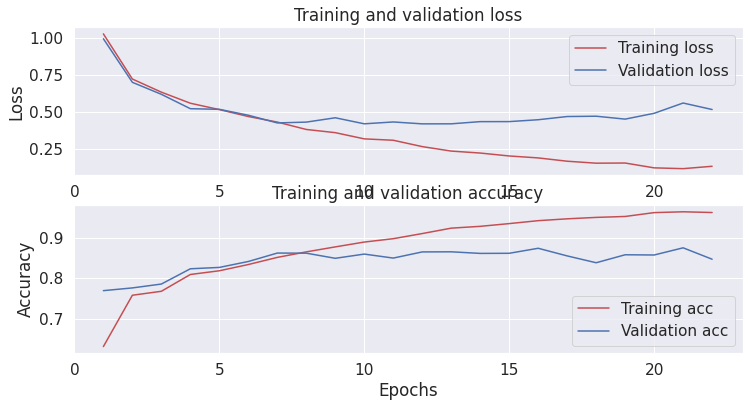

In [54]:
### Visualizing Models Preformance 

history_dict = hist.history


print(history_dict.keys())

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(12, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [55]:
### Defining functing to get the minimum value loss and maximum accuracy in Training


def get_min_val_loss_epoch(history):
    return "0"+str(np.argmin(hist.history['val_loss'])+1)

def get_max_val_acc_epoch(history):
    return "0"+str(np.argmax(hist.history['val_categorical_accuracy'])+1)

In [57]:
### evaluating model

test_loss, test_accuracy = model.evaluate(X_test,Y_test_cat )

print(f'Loss: {test_loss}')
print(f'Accuracy: {test_accuracy}')


160/160 [==============================] - 29s 182ms/step - loss: 0.5395 - categorical_accuracy: 0.8420
Loss: 0.5395209789276123
Accuracy: 0.8419506549835205


In [60]:
### viewing which epoch produced best results

epoch_num = get_max_val_acc_epoch(hist)
epoch_num
# model.load_weights(output_dir+"/weights."+epoch_num+".hdf5") # Load in model weights

'021'

In [61]:
### Model.predict


y_test_probs = model.predict(X_test)

# Turn probabilities into an interger prediction
y_hat = []
for prob in y_test_probs:
    y_hat.append(np.argmax(prob))

160/160 [==============================] - 33s 178ms/step


Accuracy: 0.8419506462984724


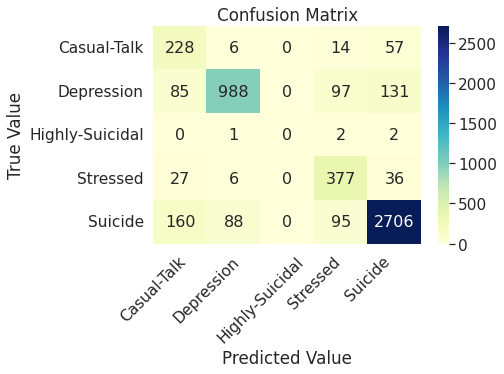

In [62]:
## Confustion Matrix

print("Accuracy:", accuracy_score(y_test, y_hat))
print_cf1(y_test, y_hat)

In [75]:
### Classification_report
print(classification_report(y_test, y_hat, target_names=labels_5))

                 precision    recall  f1-score   support

    Casual-Talk       0.56      0.64      0.60       305
     Depression       0.90      0.79      0.84      1301
Highly-Suicidal       0.00      0.00      0.00         5
       Stressed       0.75      0.76      0.76       446
        Suicide       0.90      0.93      0.92      3049

       accuracy                           0.86      5106
      macro avg       0.62      0.63      0.62      5106
   weighted avg       0.87      0.86      0.86      5106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
[print(example, '\n') for example in x_test[(y_test == 2) & (np.asarray(y_hat) == 0)][:5]];


## Saving and Loading model

In [ ]:
%pwd

In [66]:
from tensorflow.keras.models import save_model, load_model

save_model(model,"electra_full_nov12.h5")

model.save("electra_full_nov12.h5")


In [67]:
loaded_model=load_model("electra_full_model_epoch_16.00__val_loss0.448__val_accuracy_0.874.h5",
                         custom_objects={'TFElectraModel':TFElectraModel})

#### evaluating loaded_model

In [68]:
test_loss, test_accuracy = loaded_model.evaluate(X_test,Y_test_cat)

print(f'Loss: {test_loss}')
print(f'Accuracy: {test_accuracy}')


160/160 [==============================] - 33s 182ms/step - loss: 0.4896 - categorical_accuracy: 0.8647
Loss: 0.48959508538246155
Accuracy: 0.8646690249443054


In [69]:
y_test_probs = loaded_model.predict(X_test)

# Turn probabilities into an interger prediction
y_hat = []
for prob in y_test_probs:
    y_hat.append(np.argmax(prob))

160/160 [==============================] - 33s 177ms/step


Accuracy: 0.8646690168429298


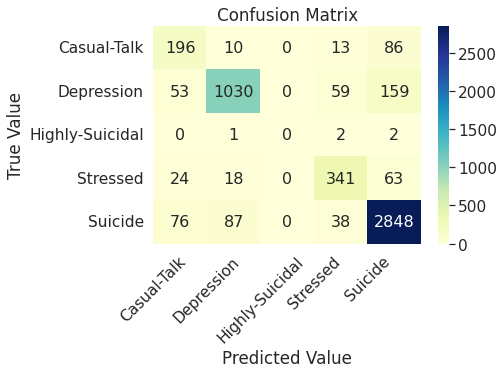

In [70]:
print("Accuracy:", accuracy_score(y_test, y_hat))
print_cf1(y_test, y_hat)

In [71]:
print(classification_report(y_test, y_hat, target_names=labels_5))

                 precision    recall  f1-score   support

    Casual-Talk       0.56      0.64      0.60       305
     Depression       0.90      0.79      0.84      1301
Highly-Suicidal       0.00      0.00      0.00         5
       Stressed       0.75      0.76      0.76       446
        Suicide       0.90      0.93      0.92      3049

       accuracy                           0.86      5106
      macro avg       0.62      0.63      0.62      5106
   weighted avg       0.87      0.86      0.86      5106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Testing model on data that model has never seen or related... Using data that is not from reditt


In [72]:
sentiment_model=loaded_model

In [80]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=500, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_token': tf.cast(token.input_ids, tf.float64),
        'masked_token': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=['Casual-Talk', 'Depression', 'Suicide', 'High-Suicidal']):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [81]:
input_text = ("I don 't deserve to be alive. I don't want to face the trials of reality, which is obviously cowardice. I have let this cowardice envelop me, and I can't shake it off.")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 4s 4s/step
Predicted Sentiment: Casual-Talk


In [82]:
input_text = ("I will be - You lookup. Stars little lights  Little places where you Cannot live with your  Lungs and your skin But  with your heart. My little world will meet, Yours and yours mine.  My organs, though left Behind in the earth to become The trees, or to live and Be wanted in another's body, I will be there as Another dot to join the dots, So that when you look up, I will be there, and you know  I will be free.")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 68ms/step
Predicted Sentiment: Casual-Talk


In [83]:
input_text = ("I guess I'm nothing more than another suicidal white girl," "Just another first-world brat succumbing to society's perfect illusions ")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 67ms/step
Predicted Sentiment: Casual-Talk


In [84]:
input_text = ("We are each given a life. We're supposed to live it. I don 't. It's as simple as that It comes suddenly and then dissolves")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 70ms/step
Predicted Sentiment: Casual-Talk


In [85]:
input_text = ("if I fail these exams, I know that my will be ruined and I can kiss University goodbye. I can kiss my life goodbye. All I want is to be a good psychologist. I can't do that without a proper degree and a Masters")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 69ms/step
Predicted Sentiment: Depression


In [86]:
input_text = ("i will die")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 68ms/step
Predicted Sentiment: Casual-Talk


In [87]:
input_text = ("i want to die")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 67ms/step
Predicted Sentiment: Casual-Talk


In [88]:
input_text = ("i want to kill myself")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 70ms/step
Predicted Sentiment: Casual-Talk


In [89]:
# input_text = ("i forgot my car keys, i will jump on the floor")
# input_text= ("just die")
input_text =(" i will jump out of the building")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment:    {result}")

1/1 [==============================] - 0s 69ms/step
Predicted Sentiment:    Casual-Talk


In [90]:
# input_text = ("i forgot my car keys, i will jump on the floor")
# input_text= ("just die")
input_text =("my partner broke up with me, i'm in hundered of thousands in debt, i dont have any alternative, i will jump out of the building")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment:    {result}")

1/1 [==============================] - 0s 69ms/step
Predicted Sentiment:    Casual-Talk


In [91]:
# input_text = (" ")
input_text= ("just kill yourself")

processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment:    {result}")

1/1 [==============================] - 0s 66ms/step
Predicted Sentiment:    Casual-Talk


In [92]:
input_text = ("Despondency failure at not doing home work sooner, convinced that I was now a total failure, total lack of motivation, fears about the future")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 69ms/step
Predicted Sentiment: Casual-Talk


In [93]:


input_text = ("I taught two people the value of life, You will lose me. My god, it will destroy you. What I will do, will be unforgiveable. I will commit the worst thing you can ever do to someone who loves you: killing yourself The scary thing is, I'm okay with that I am not sad so much as gone")
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(sentiment_model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")

1/1 [==============================] - 0s 68ms/step
Predicted Sentiment: Casual-Talk
